In [81]:
# Download Dependecies
import pandas as pd
import requests
import pprint
import json


In [82]:
# Set variable for start data and end date for Data to be fetched
startDate = "2025-01-01"
endDate   = "2025-04-30"
# Download historical SOFR data from New York Fed (CSV)
# url = "https://markets.newyorkfed.org/api/rp/results/search.json?startDate=2025-01-01&endDate=2025-04-30&operationTypes=Reverse%20Repo&method=single&securityType=srf&term=overnight"

# url = "https://markets.newyorkfed.org/api/rp/results/search.json?startDate=2025-01-01&endDate=2025-04-30"
# Using the start Date and end Date, download data from the new york Fed web API
url = f"https://markets.newyorkfed.org/api/rp/results/search.json?startDate={startDate}&endDate={endDate}"
print(url)

https://markets.newyorkfed.org/api/rp/results/search.json?startDate=2025-01-01&endDate=2025-04-30


In [85]:
# using the request module fetch data from the API, and convert it to a json
response = requests.get(url)
response_json=response.json()
#check if the API is providing a success code of 200
print(response.status_code)
print(response)

200
<Response [200]>


In [47]:
# Look at the JSON download and check the length of them
print(len(response_json))
print(len(response_json['repo']))
print(len(response_json['repo']['operations']))
data_df= pd.DataFrame(response_json['repo']['operations'])

1
1
176


In [48]:
# Peek into the structure
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operationId        176 non-null    object 
 1   auctionStatus      176 non-null    object 
 2   operationDate      176 non-null    object 
 3   settlementDate     176 non-null    object 
 4   maturityDate       176 non-null    object 
 5   operationType      176 non-null    object 
 6   operationMethod    176 non-null    object 
 7   settlementType     176 non-null    object 
 8   termCalenderDays   176 non-null    int64  
 9   term               176 non-null    object 
 10  releaseTime        176 non-null    object 
 11  closeTime          176 non-null    object 
 12  note               176 non-null    object 
 13  lastUpdated        176 non-null    object 
 14  participatingCpty  84 non-null     float64
 15  acceptedCpty       84 non-null     float64
 16  totalAmtSubmitted  176 non

In [68]:
#copy the data frame to a new df
Cleaned_df = data_df.copy()

#look at info of the new cleaned df 
Cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operationId        176 non-null    object 
 1   auctionStatus      176 non-null    object 
 2   operationDate      176 non-null    object 
 3   settlementDate     176 non-null    object 
 4   maturityDate       176 non-null    object 
 5   operationType      176 non-null    object 
 6   operationMethod    176 non-null    object 
 7   settlementType     176 non-null    object 
 8   termCalenderDays   176 non-null    int64  
 9   term               176 non-null    object 
 10  releaseTime        176 non-null    object 
 11  closeTime          176 non-null    object 
 12  note               176 non-null    object 
 13  lastUpdated        176 non-null    object 
 14  participatingCpty  84 non-null     float64
 15  acceptedCpty       84 non-null     float64
 16  totalAmtSubmitted  176 non

In [69]:
#change the data type of datetime columns and time columns to time columns 
date_col=  ["operationDate", "settlementDate", "maturityDate",  "lastUpdated"]
time_col = ["closeTime","releaseTime"]
# Apply the chages datetype to the cleaned_df data frame

Cleaned_df[date_col] = Cleaned_df[date_col].apply(pd.to_datetime)

# Loop through and apply the change new data type to the applicable columns
for col in time_col:
    Cleaned_df[col] = Cleaned_df[col].apply(pd.to_datetime).dt.time
Cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   operationId        176 non-null    object        
 1   auctionStatus      176 non-null    object        
 2   operationDate      176 non-null    datetime64[ns]
 3   settlementDate     176 non-null    datetime64[ns]
 4   maturityDate       176 non-null    datetime64[ns]
 5   operationType      176 non-null    object        
 6   operationMethod    176 non-null    object        
 7   settlementType     176 non-null    object        
 8   termCalenderDays   176 non-null    int64         
 9   term               176 non-null    object        
 10  releaseTime        176 non-null    object        
 11  closeTime          176 non-null    object        
 12  note               176 non-null    object        
 13  lastUpdated        176 non-null    datetime64[ns]
 14  participat

In [70]:
Cleaned_df = Cleaned_df.sort_values('operationDate',ascending=False)
Cleaned_df

,operationId,auctionStatus,operationDate,settlementDate,maturityDate,operationType,operationMethod,settlementType,termCalenderDays,term,...,closeTime,note,lastUpdated,participatingCpty,acceptedCpty,totalAmtSubmitted,totalAmtAccepted,details,operationLimit,propositions
0,RP 043025 1,Results,2025-04-30,2025-04-30,2025-05-01,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2025-04-30 13:18:48,54.0,54.0,250601000000,250601000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,NaN
1,RP 043025 2,Results,2025-04-30,2025-04-30,2025-05-01,Repo,Multiple Price,Same Day,1,Overnight,...,13:45:00,,2025-04-30 13:45:59,NaN,NaN,110000000,110000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
2,RP 042925 1,Results,2025-04-29,2025-04-29,2025-04-30,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2025-04-29 13:15:32,37.0,37.0,157537000000,157537000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,NaN
3,RP 042925 2,Results,2025-04-29,2025-04-29,2025-04-30,Repo,Multiple Price,Same Day,1,Overnight,...,13:45:00,,2025-04-29 13:45:25,NaN,NaN,0,0,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
4,RP 042825 1,Results,2025-04-28,2025-04-28,2025-04-29,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2025-04-28 13:15:47,38.0,38.0,148649000000,148649000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,RP 010325 2,Results,2025-01-03,2025-01-03,2025-01-06,Reverse Repo,Fixed Rate,Same Day,3,Overnight,...,13:15:00,,2025-01-03 13:16:04,57.0,57.0,237377000000,237377000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,"[{'counterpartyType': 'bank', 'amtAccepted': 0..."
172,RP 010325 3,Results,2025-01-03,2025-01-03,2025-01-06,Repo,Multiple Price,Same Day,3,Overnight,...,13:45:00,,2025-01-03 13:46:13,NaN,NaN,0,0,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
173,RP 010225 1,Results,2025-01-02,2025-01-02,2025-01-03,Repo,Multiple Price,Same Day,1,Overnight,...,08:30:00,,2025-01-02 08:30:40,NaN,NaN,1000000,1000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
174,RP 010225 2,Results,2025-01-02,2025-01-02,2025-01-03,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2025-01-02 13:15:54,64.0,64.0,239858000000,239858000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,"[{'counterpartyType': 'bank', 'amtAccepted': 0..."


In [71]:
reduced_cleaned_df  = Cleaned_df
reduced_cleaned_df = reduced_cleaned_df.drop(columns=['operationLimit','propositions','releaseTime','closeTime'])
reduced_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 175
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   operationId        176 non-null    object        
 1   auctionStatus      176 non-null    object        
 2   operationDate      176 non-null    datetime64[ns]
 3   settlementDate     176 non-null    datetime64[ns]
 4   maturityDate       176 non-null    datetime64[ns]
 5   operationType      176 non-null    object        
 6   operationMethod    176 non-null    object        
 7   settlementType     176 non-null    object        
 8   termCalenderDays   176 non-null    int64         
 9   term               176 non-null    object        
 10  note               176 non-null    object        
 11  lastUpdated        176 non-null    datetime64[ns]
 12  participatingCpty  84 non-null     float64       
 13  acceptedCpty       84 non-null     float64       
 14  totalAmtSubmitt

In [72]:
reduced_cleaned_df

,operationId,auctionStatus,operationDate,settlementDate,maturityDate,operationType,operationMethod,settlementType,termCalenderDays,term,note,lastUpdated,participatingCpty,acceptedCpty,totalAmtSubmitted,totalAmtAccepted,details
0,RP 043025 1,Results,2025-04-30,2025-04-30,2025-05-01,Reverse Repo,Fixed Rate,Same Day,1,Overnight,,2025-04-30 13:18:48,54.0,54.0,250601000000,250601000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
1,RP 043025 2,Results,2025-04-30,2025-04-30,2025-05-01,Repo,Multiple Price,Same Day,1,Overnight,,2025-04-30 13:45:59,NaN,NaN,110000000,110000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
2,RP 042925 1,Results,2025-04-29,2025-04-29,2025-04-30,Reverse Repo,Fixed Rate,Same Day,1,Overnight,,2025-04-29 13:15:32,37.0,37.0,157537000000,157537000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
3,RP 042925 2,Results,2025-04-29,2025-04-29,2025-04-30,Repo,Multiple Price,Same Day,1,Overnight,,2025-04-29 13:45:25,NaN,NaN,0,0,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
4,RP 042825 1,Results,2025-04-28,2025-04-28,2025-04-29,Reverse Repo,Fixed Rate,Same Day,1,Overnight,,2025-04-28 13:15:47,38.0,38.0,148649000000,148649000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,RP 010325 2,Results,2025-01-03,2025-01-03,2025-01-06,Reverse Repo,Fixed Rate,Same Day,3,Overnight,,2025-01-03 13:16:04,57.0,57.0,237377000000,237377000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
172,RP 010325 3,Results,2025-01-03,2025-01-03,2025-01-06,Repo,Multiple Price,Same Day,3,Overnight,,2025-01-03 13:46:13,NaN,NaN,0,0,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
173,RP 010225 1,Results,2025-01-02,2025-01-02,2025-01-03,Repo,Multiple Price,Same Day,1,Overnight,,2025-01-02 08:30:40,NaN,NaN,1000000,1000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
174,RP 010225 2,Results,2025-01-02,2025-01-02,2025-01-03,Reverse Repo,Fixed Rate,Same Day,1,Overnight,,2025-01-02 13:15:54,64.0,64.0,239858000000,239858000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."


In [74]:
# Observe the column in new dataframe and remove if required
reduced_cleaned_df.columns

Index(['operationId', 'auctionStatus', 'operationDate', 'settlementDate',
       'maturityDate', 'operationType', 'operationMethod', 'settlementType',
       'termCalenderDays', 'term', 'note', 'lastUpdated', 'participatingCpty',
       'acceptedCpty', 'totalAmtSubmitted', 'totalAmtAccepted', 'details'],
      dtype='object')

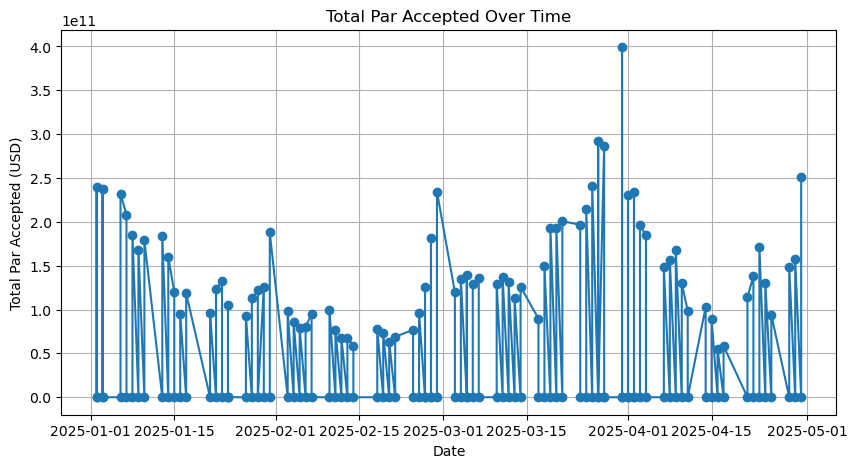

In [77]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(reduced_cleaned_df['operationDate'], reduced_cleaned_df['totalAmtAccepted'], marker='o')
plt.title("Total Par Accepted Over Time")
plt.xlabel("Date")
plt.ylabel("Total Par Accepted (USD)")
plt.grid(True)
plt.show()

In [78]:
import plotly.express as px

fig = px.line(reduced_cleaned_df, x="operationDate", y="totalAmtAccepted", title="Repo Market: Total Par Accepted")
fig.show()

In [79]:
data_df.groupby("operationType")["totalAmtAccepted"].sum()

operationType
Repo                 845000000
Reverse Repo    11840339000000
Name: totalAmtAccepted, dtype: int64